#**Business case study**



**Buisness Problem:**
- The Management team wants to analyze the customer purchase
behavior (precisely, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?


##**What does ‘good’ look like?**


Features of the Dataset
- User_ID: User ID
- Product_ID: Product ID
- Gender: Sex of User
- Age: Age in bins
- Occupation: Occupation
- City_Category: Category of the City (A,B,C)
- StayInCurrentCityYears: Number of years stay in current city
- Marital_Status: Marital Status
- ProductCategory: Product Category
- Purchase: Purchase Amount

###**1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**
- The data type of all columns in the “customers” table.
  
  Hint: We want you to display the data type of each column present in the
  dataset.
- You can find the number of rows and columns given in the dataset
  
  Hint: You can find the shape of the dataset.

- Check for the missing values and find the number of missing values in each
column


In [ ]:
 #importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
import copy

In [ ]:
!gdown 12bAuu5DEPWs8gv9SFbkVTvP3T0cYl8dS

Downloading...
From: https://drive.google.com/uc?id=12bAuu5DEPWs8gv9SFbkVTvP3T0cYl8dS
To: /content/walmart_data.txt
100% 23.0M/23.0M [00:00<00:00, 84.1MB/s]


In [ ]:
df = pd.read_csv('walmart_data.txt')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
# Number of Rows and Columns
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 550,068 
Number of columns: 10


In [ ]:
# Total memory being used by each column in the dataframe in bytes
df.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category              4400544
Purchase                      4400544
dtype: int64

In [ ]:
# Display the data type of each column present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Insights:
- From the above analysis, it is clear that, data has total of 10 features with lots of mixed alpha numeric data.
- Apart from Purchase Column, all the other data types are of categorical type. We will change the datatypes of all such columns to category.

In [ ]:
for i in df.columns[:-1]:
  df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
# Checking of null values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
 # Duplicates Detection
df.duplicated().sum()

0

Insights:
- The dataset is devoid of any missing values or duplicates, ensuring its cleanliness and integrity for analysis

In [ ]:
#Statistical summary of object type columns
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
#Statistical summary of numerical data type columns
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


Insights:
- The range of purchase amounts is quite diverse, ranging from a minimum of 12 Dollars to a maximum of 23,961 Dollars.
- The median purchase amount of 8,047 Dollars is significantly lower than the mean purchase amount of 9,264 Dollars, suggesting a right-skewed distribution where a few high-value purchases are driving up the mean.

In [ ]:
# Unique Values in Each Column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [ ]:
df['Age'].value_counts().sort_index()

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: count, dtype: int64

In [ ]:
df['City_Category'].value_counts().sort_index()

City_Category
A    147720
B    231173
C    171175
Name: count, dtype: int64

In [ ]:
df['Marital_Status'].value_counts().sort_index()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

Insights:
- Approximately 80% of our user base falls within the age range of 18 to 50, with 40% aged between 26 and 35, 18% between 18 and 25, and 20% between 36 and 45.
- The gender distribution among our users is 75% male and 25% female.
- In terms of marital status, 60% of our users are single while 40% are married.
- Regarding residency, 35% of users have been living in the city for 1 year, 18% for 2 years, and 17% for 3 years.
- Our platform offers a total of 20 product categories for user engagement.
- There are 20 distinct types of occupations represented within our user community.

###**2. Detect Null values and outliers**
- Find the outliers for every continuous variable in the dataset
  
  Hint: Use boxplots to find the outliers in the given dataset.
- Remove/clip the data between the 5 percentile and 95 percentile
  
  Hint: You can use np.clip() for clipping the data.


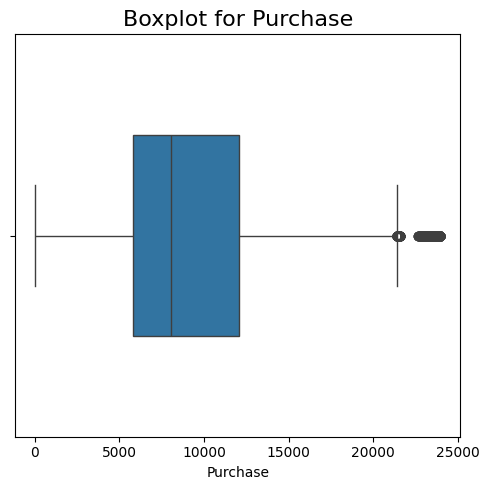

In [ ]:
plt.figure(figsize=(5, 5))
# Create a box plot for 'Purchase'
sns.boxplot(x='Purchase', data=df, width=0.5)
plt.title('Boxplot for Purchase', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate quartiles and IQR for the specified column
Q1 = np.percentile(df['Purchase'], 25)
Q3 = np.percentile(df['Purchase'], 75)
IQR = Q3 - Q1

# Upper and lower bounds for outliers
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Clipping the outliers using np.clip()
clipped_data = np.clip(df['Purchase'], lower_bound, upper_bound)

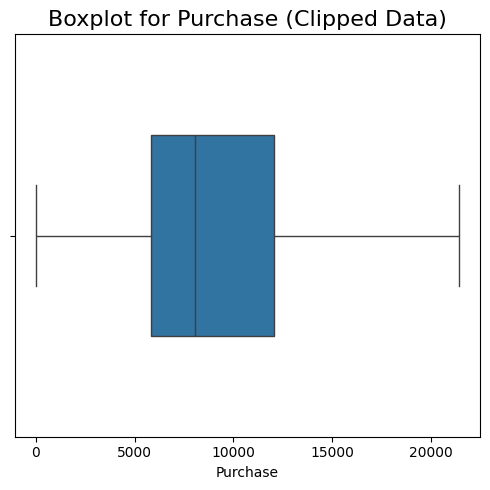

In [ ]:
plt.figure(figsize=(5, 5))
# Create a box plot for clipped data
sns.boxplot(x=clipped_data, width=0.5, orient='h')
plt.title('Boxplot for Purchase (Clipped Data)', fontsize=16)
plt.tight_layout()
plt.show()


Insights:
- By setting the upper and lower bounds at the 25th and 75th percentiles, a significant portion of the outliers can be effectively removed, unlike when clipping data between the 9th and 95th percentiles, which does not eliminate many outliers

###**3. Data Exploration**
- What products are different age groups buying?

  Hint: You can use histplot to find the relationship between products and age
  groups
- Is there a relationship between age, marital status, and the amount spent?

  Hint: You can do multivariate analysis to find the relationship between age,
  marital status, and the amount spent
- Are there preferred product categories for different genders?
  
  Hint: You can apply different hist plots for different genders


####**Univariate Analysis**

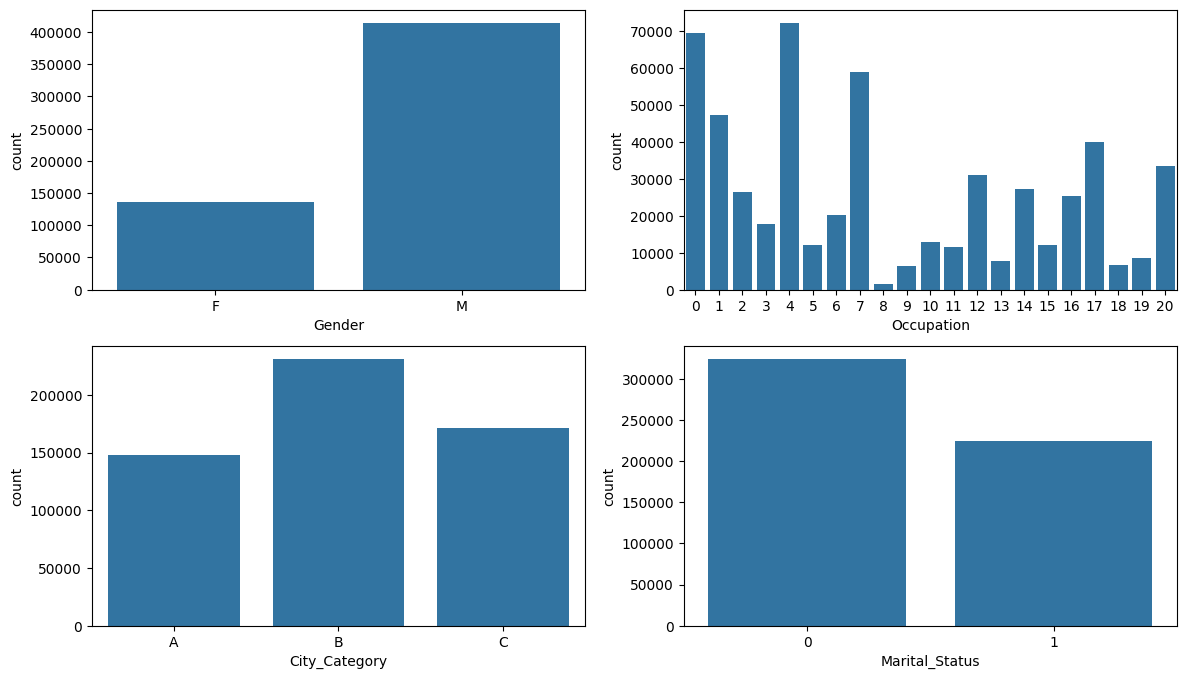

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

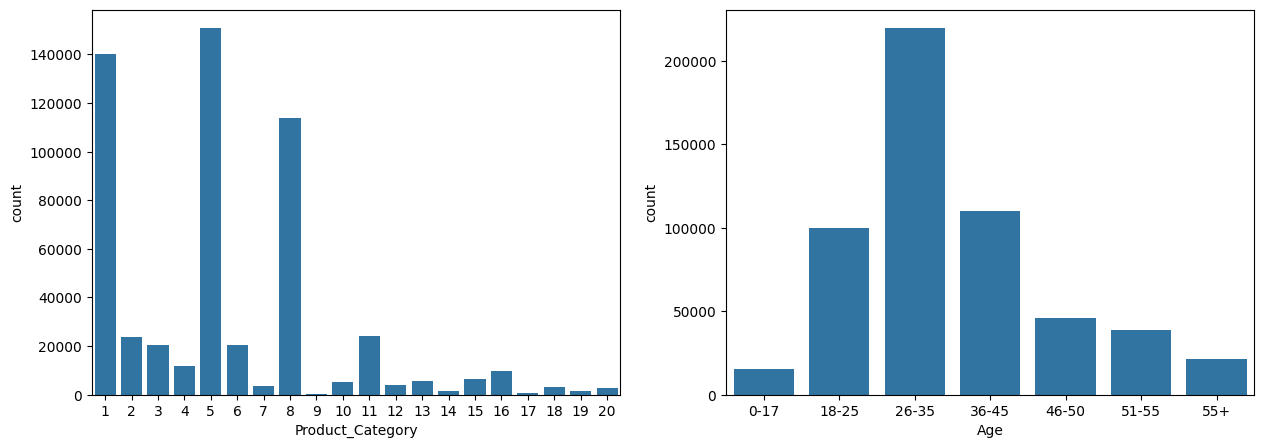

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Product_Category')
plt.subplot(1,2,2)
sns.countplot(data=df, x='Age')
plt.show()

Insights:
- The majority of users are male.
- There are 20 distinct types of occupation and product categories.
- A larger number of users are associated with City_Category B.
- Single users outnumber married users.
- Product categories 1, 5, 8, and 11 exhibit the highest purchase frequency

####**Bi-variate analysis**

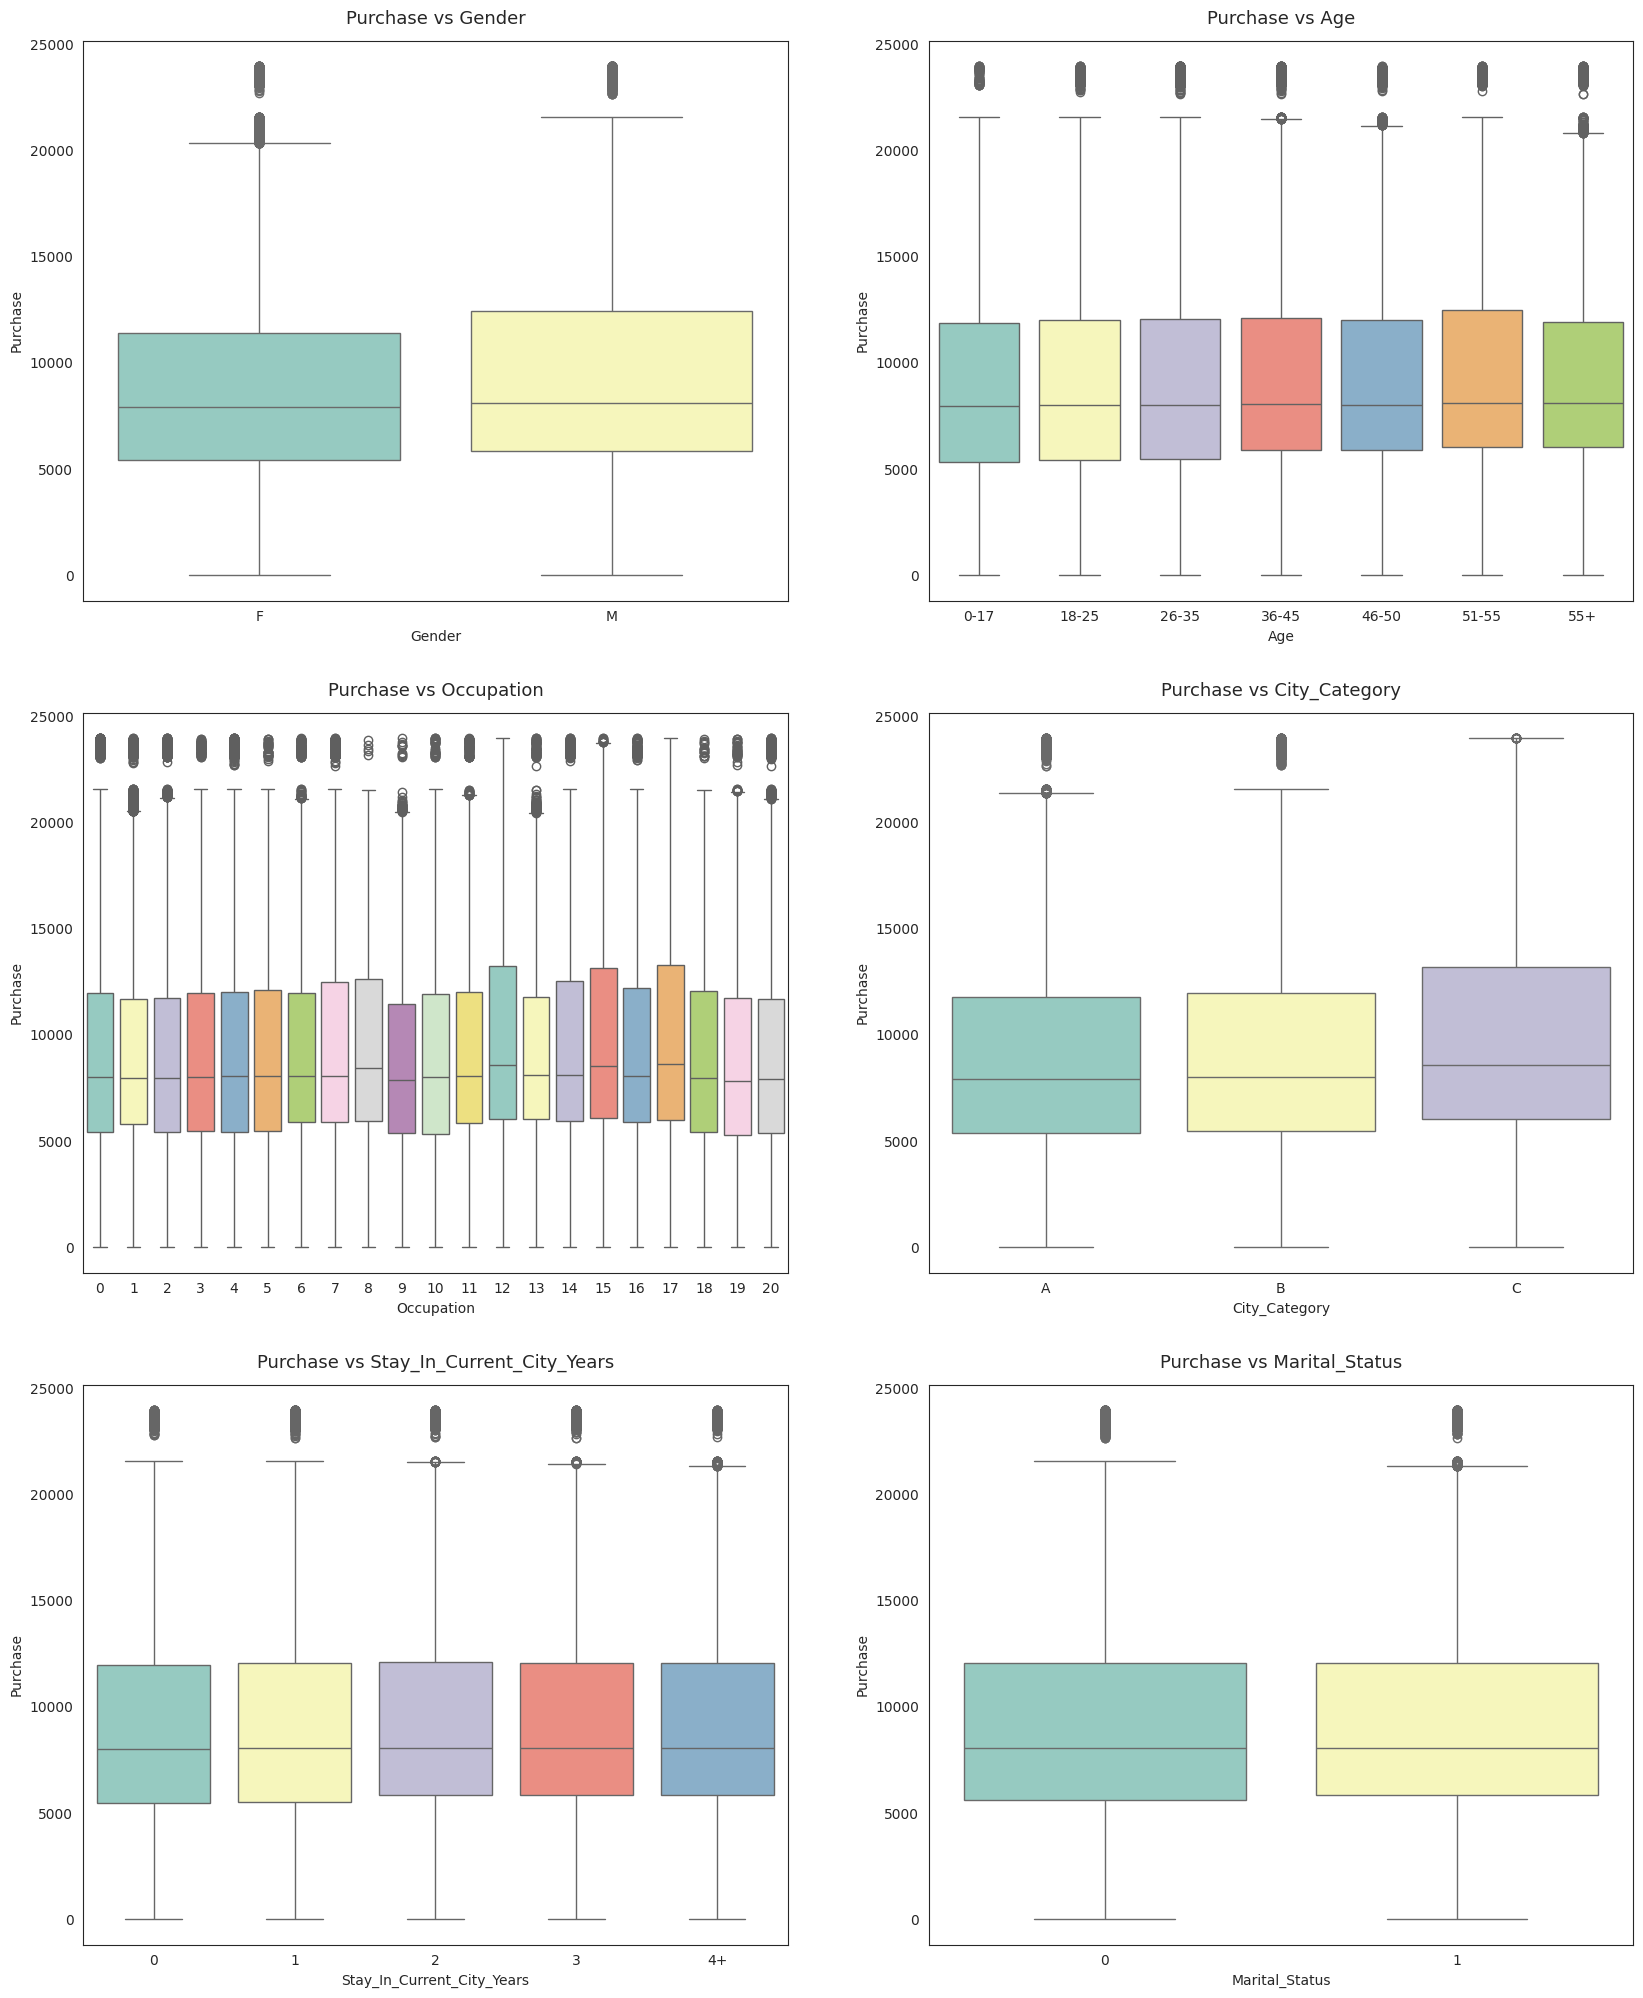

In [ ]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
 for col in range(2):
  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row,col], palette='Set3')
  axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12,
  fontsize=13)
  count += 1
plt.show()

Insights:

- Out of all the variables analysed above, it's noteworthy that the purchase amount remains relatively stable regardless of the variable under consideration.
- As indicated in the data, the median purchase amount consistently hovers around 8,000 USD , regardless of the specific variable being examined.


####**Multi-variate Analysis**

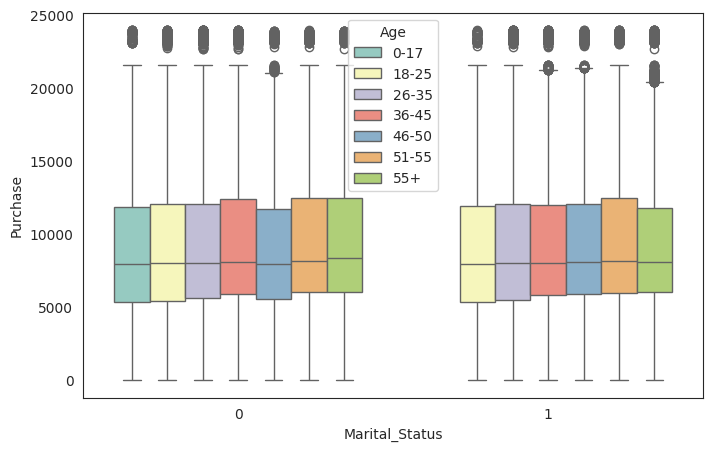

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(data=df, y='Purchase', x='Marital_Status', hue='Age', palette='Set3')
plt.show()

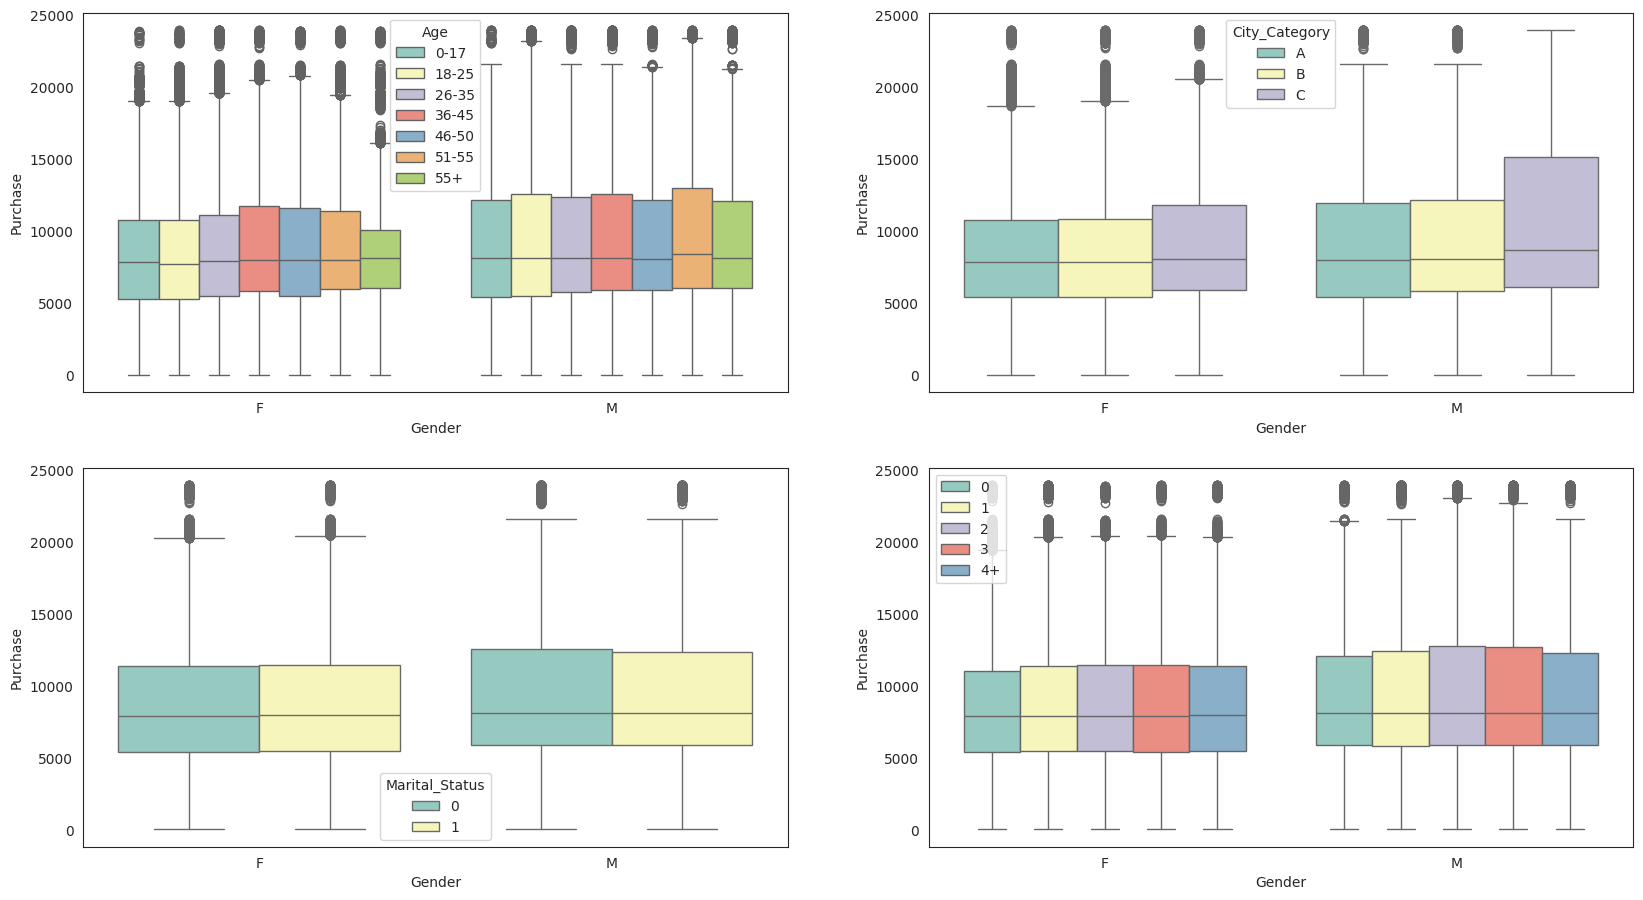

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')
plt.show()

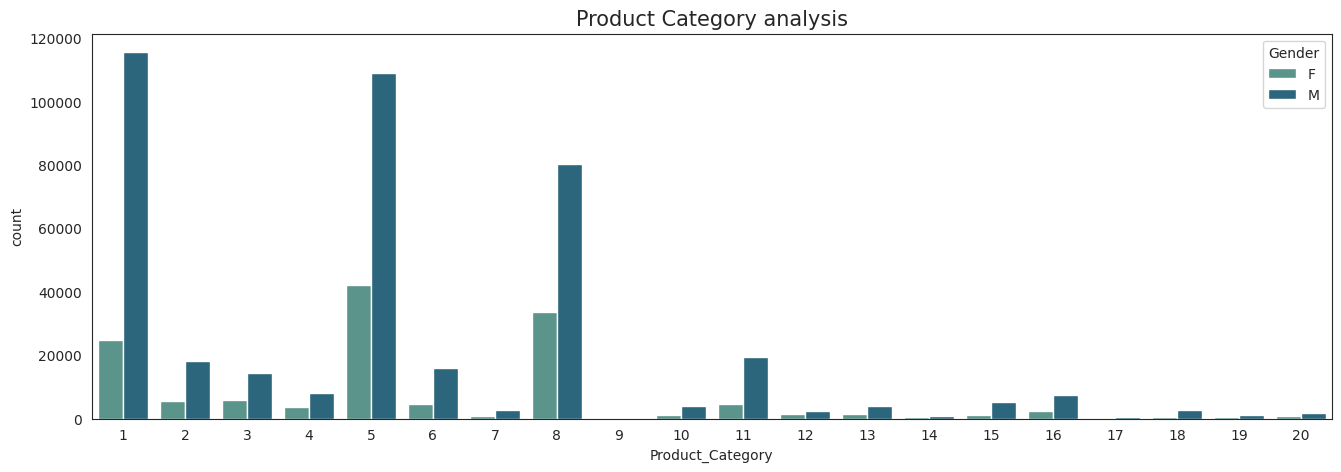

In [ ]:
fig = plt.figure(figsize=(16, 5))
plt.title('Product Category analysis', fontsize = 15)
sns.countplot(data=df, x = 'Product_Category', hue = 'Gender', palette= 'crest')
plt.show()

Insights:
- Product Category 5 and 8 are demanding among female customers
- Proudct Category 1 and 5 are most demanding among male customers

###**4. How does gender affect the amount spent?**

- Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence intervals for the average amount spent per gender. First, compute the confidence interval for whatever data is available, and then repeat the same with smaller sample sizes - 300, 3000, and 30000.

- From the above calculated CLT answer the following questions.
    - Is the confidence interval computed using the entire dataset wider for
    one of the genders? Why is this the case?
    - How is the width of the confidence interval affected by the sample size?
    - Do the confidence intervals for different sample sizes overlap?
    - How does the sample size affect the shape of the distributions of the
    means?

In [ ]:
df_male = df[df['Gender'] == 'M']['Purchase']
df_female = df[df['Gender'] == 'F']['Purchase']
print("Male Customers : ",df_male.shape[0])
print("Female Customers : ",df_female.shape[0])

Male Customers :  414259
Female Customers :  135809


In [ ]:
from scipy import stats
def bootstrapping(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)

    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = np.std(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)

    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = np.std(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)

    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("white")

    sns.kdeplot(data=smp1_means_m,fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,fill=True,linewidth=2)

    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))

    plt.title(f"{confidence_level * 100}% CI on sample size = {smp_siz}")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='best')

    plt.show()

    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

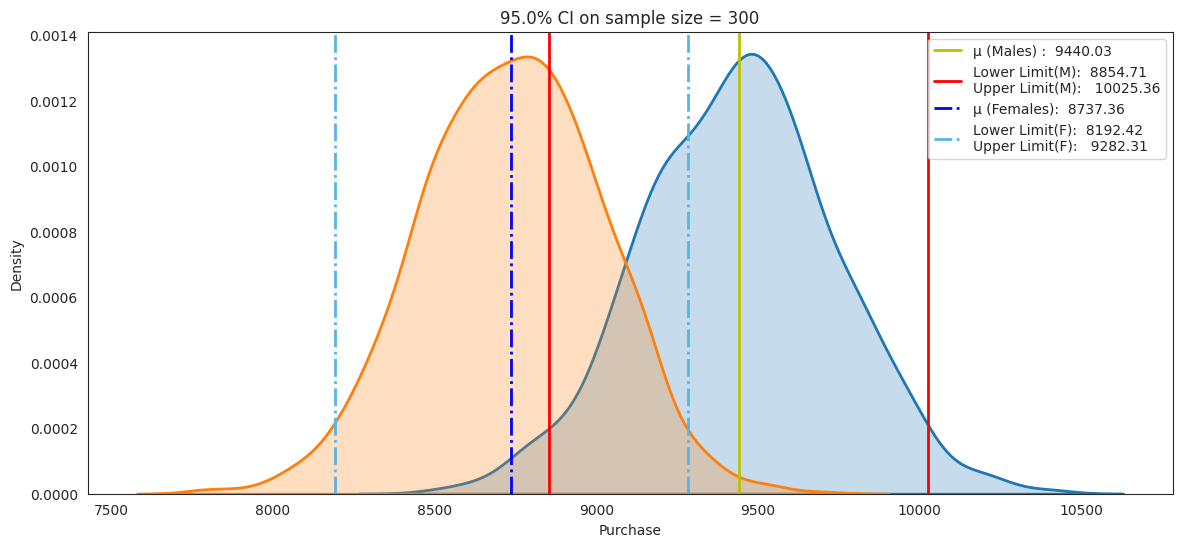

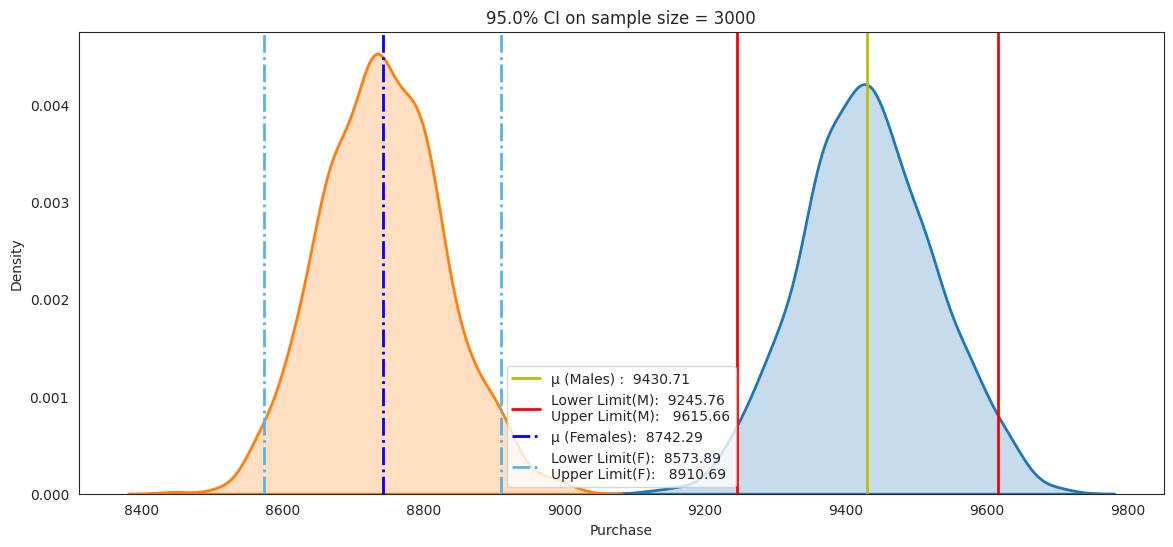

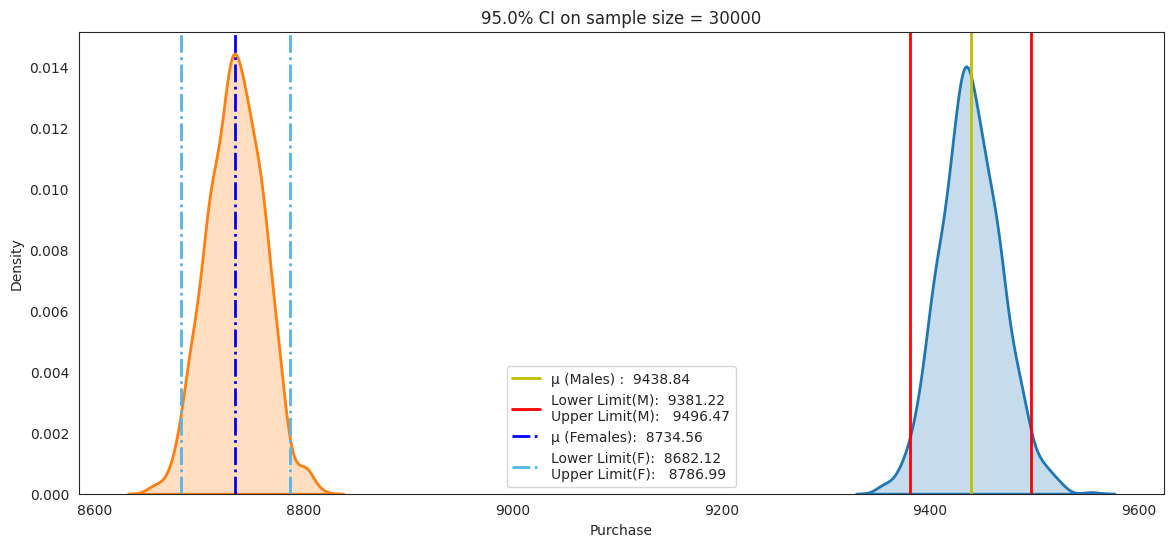

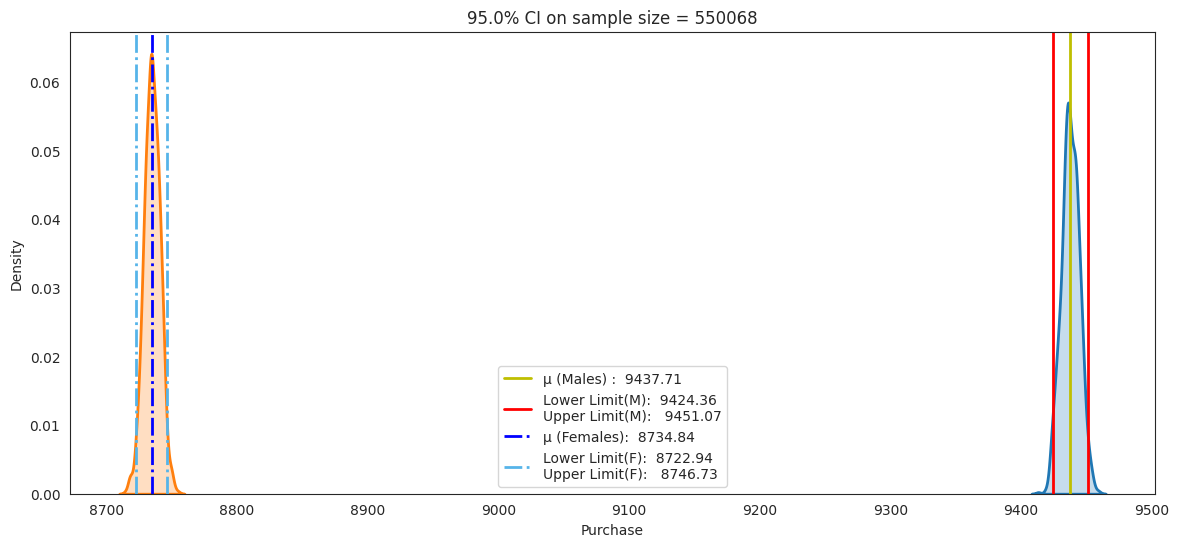

In [ ]:
itr_size = 1000
size_list = [300, 3000, 30000, df.shape[0]]
ci = 0.95

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(df_male,df_female,smp_siz,itr_size,ci)

overlap = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
print()

Insights:
- As the sample size increases, the Male and female groups start to become distinct.
- With increasing sample size, Standard error of the mean in the samples decreases.


###**5. How does Marital_Status affect the amount spent?**
- Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence intervals for the average amount spent per gender. First, compute the confidence interval for whatever data is available, and then repeat the same with smaller sample sizes - 300, 3000, and 30000.

- From the above calculated CLT answer the following questions.
    - Is the confidence interval computed using the entire dataset wider for
    one of the genders? Why is this the case?
    - How is the width of the confidence interval affected by the sample size?
    - Do the confidence intervals for different sample sizes overlap?
    - How does the sample size affect the shape of the distributions of the
    means?

In [ ]:
df['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
df['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [ ]:
df.sample(500,replace=True).groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Unmarried,293.0,9392.696246,5189.105720,24.0,5394.0,8073.0,12122.0,21276.0
Married,207.0,9204.743961,5294.130559,12.0,5325.5,8092.0,11927.5,23854.0


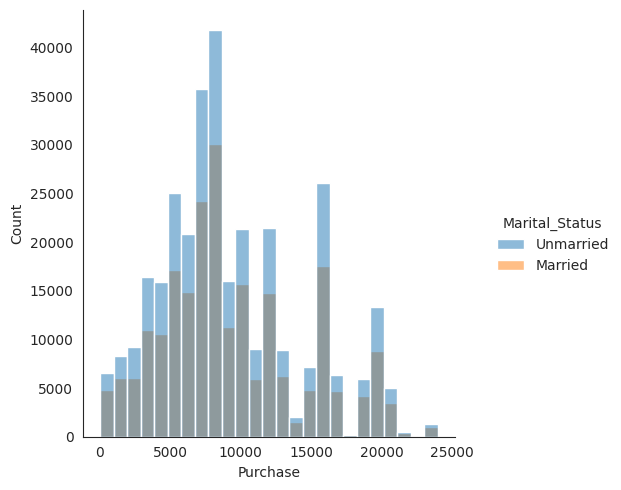

In [ ]:
sns.displot(data = df, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

In [ ]:
df_married = df[df['Marital_Status'] == 'Married']['Purchase']
df_unmarried = df[df['Marital_Status'] == 'Unmarried']['Purchase']

In [ ]:
def bootstrapping_marital(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):

    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)

#     std_dev1 = np.std(sample1)
#     std_err1 = np.std(sample1,ddof=1)/np.sqrt(smp_siz)
#     std_dev2 = np.std(sample2)
#     std_err2 = np.std(sample2,ddof=1)/np.sqrt(smp_siz)

    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = np.std(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)

    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = np.std(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)

#     print(smp_siz,std_dev1,std_err1,sem1)
#     print(smp_siz,std_dev2,std_err2,sem2)

    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)

    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))

    plt.title(f"Sample Size: {smp_siz}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)},Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}",
              fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

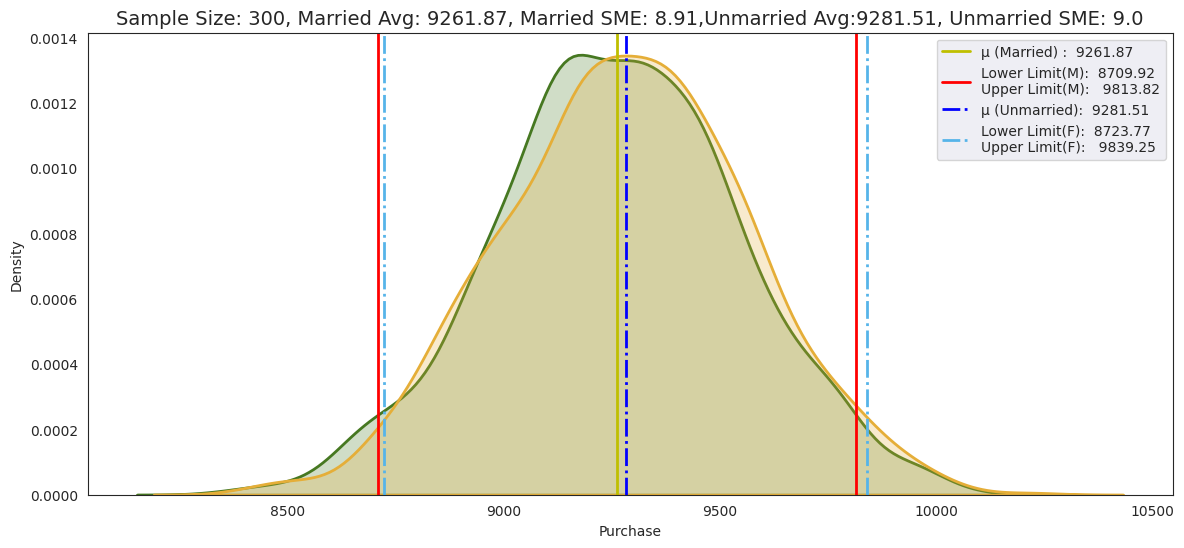

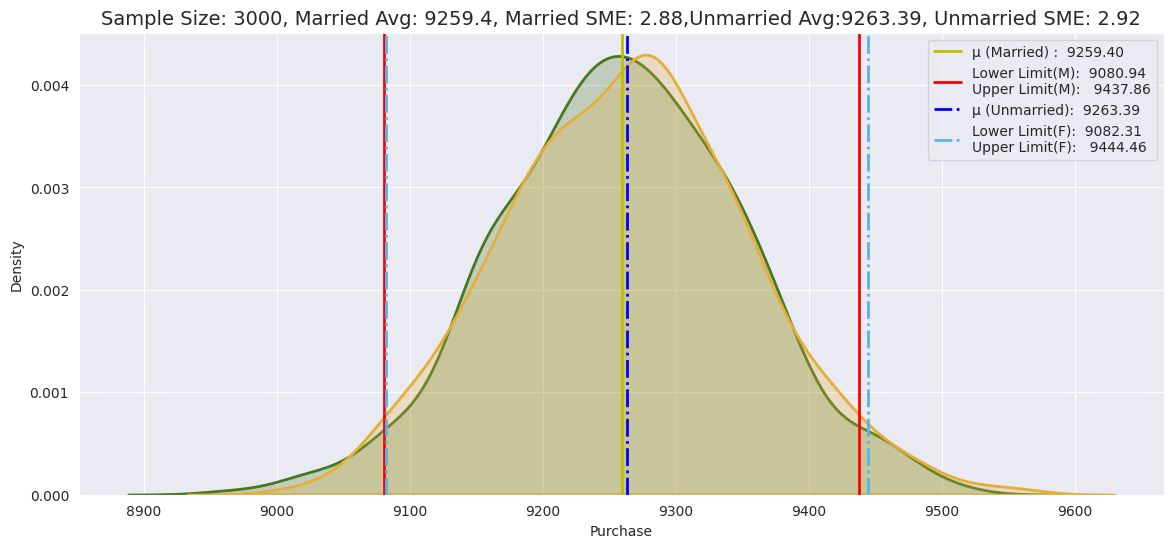

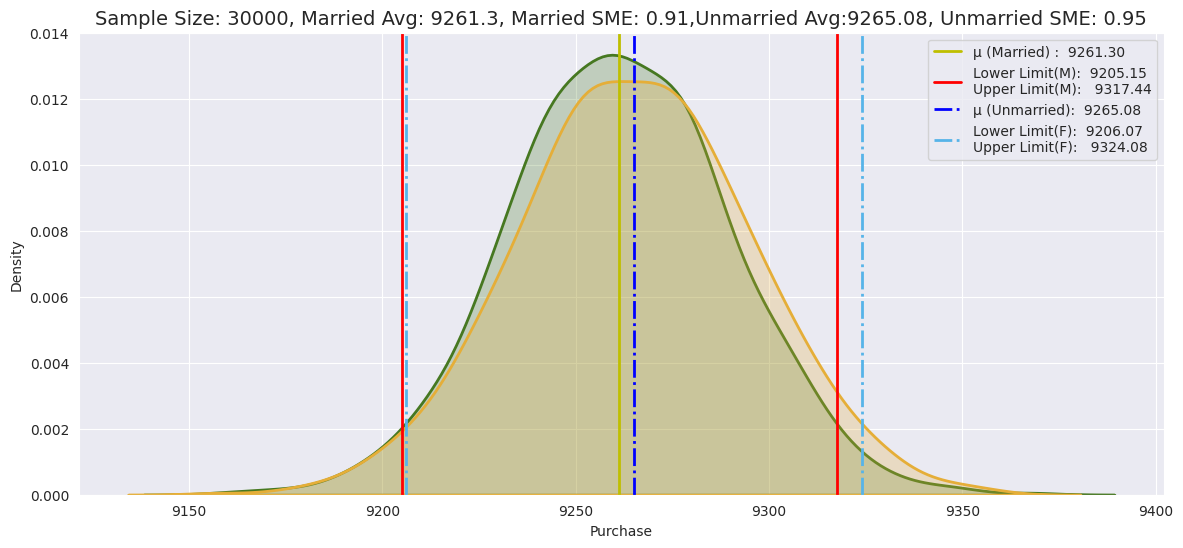

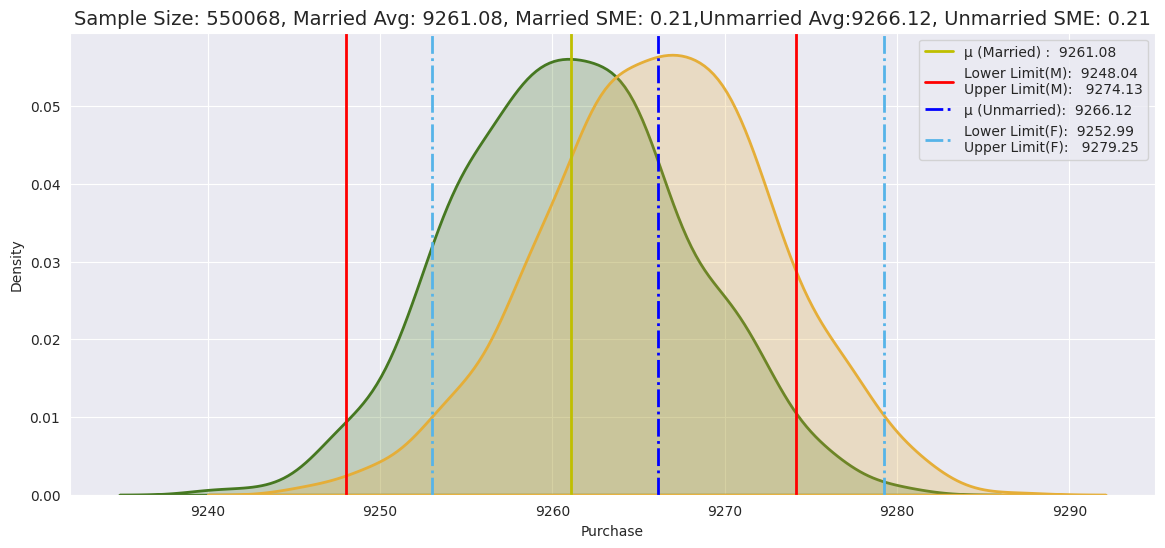

In [ ]:
itr_size = 1000
size_list = [300, 3000, 30000, df.shape[0]]
ci = 0.95

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_marital(df_married, df_unmarried,smp_siz,itr_size,ci)

overlap = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

Insights:
- Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.

###**6. How does Age affect the amount spent?**

- Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence intervals for the average amount spent per gender. First, compute the confidence interval for whatever data is available, and then repeat the same with smaller sample sizes - 300, 3000, and 30000.

- From the above calculated CLT answer the following questions.
    - Is the confidence interval computed using the entire dataset wider for
    one of the genders? Why is this the case?
    - How is the width of the confidence interval affected by the sample size?
    - Do the confidence intervals for different sample sizes overlap?
    - How does the sample size affect the shape of the distributions of the
    means?

In [ ]:
age_data = df.groupby(["Age"])["Purchase"].describe()
age_data

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.95,age= "0-17", no_of_tails=2):

    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)

    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = np.std(smp_means_m)
    sem   = stats.sem(smp_means_m)

    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=smp_means_m,color="#7A68A6",fill=True,linewidth=2)

    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))

    plt.title(f"{confidence_level * 100} CI on sample size {smp_siz} on age bracket {age}")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

    return smp_means_m ,np.round(lower_limit,2),np.round(upper_limit,2)

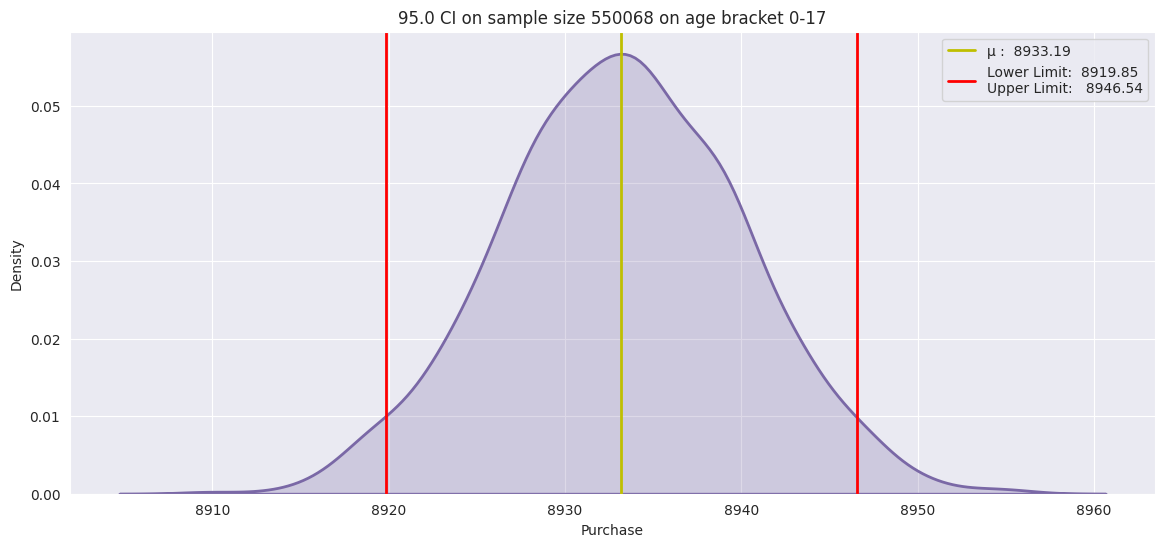

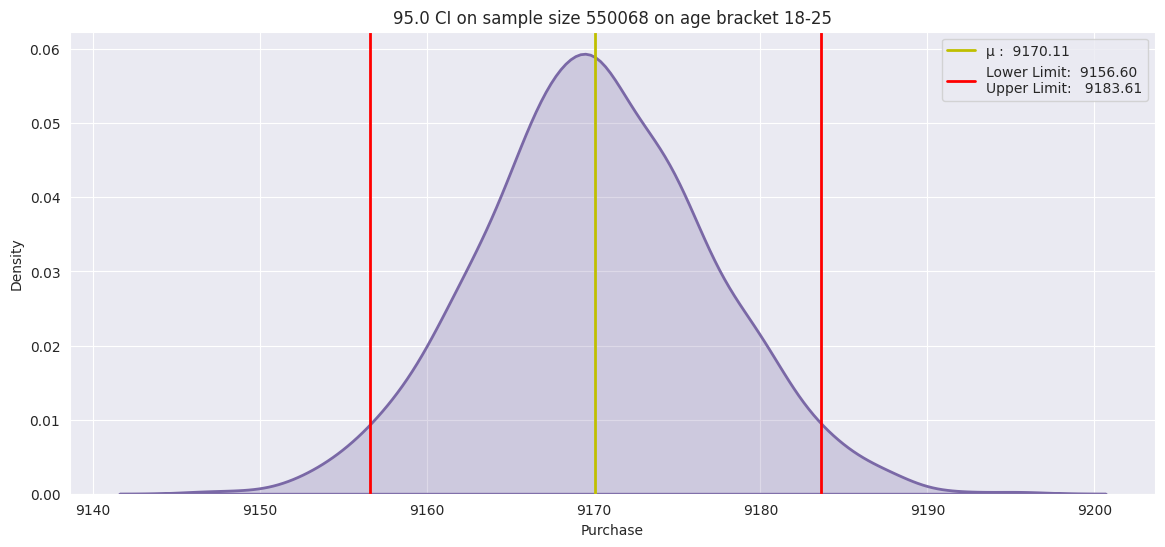

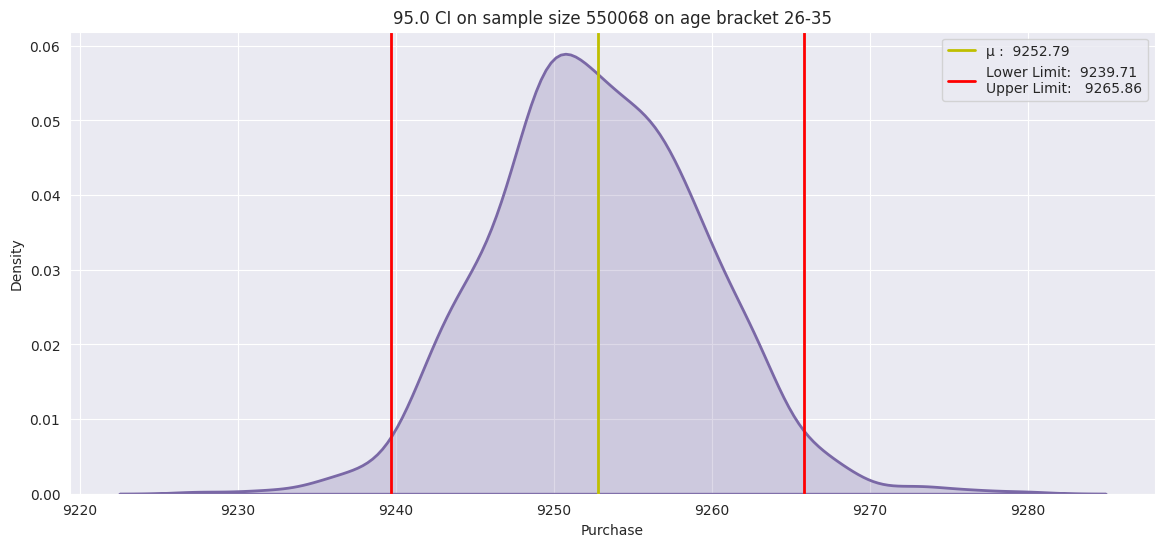

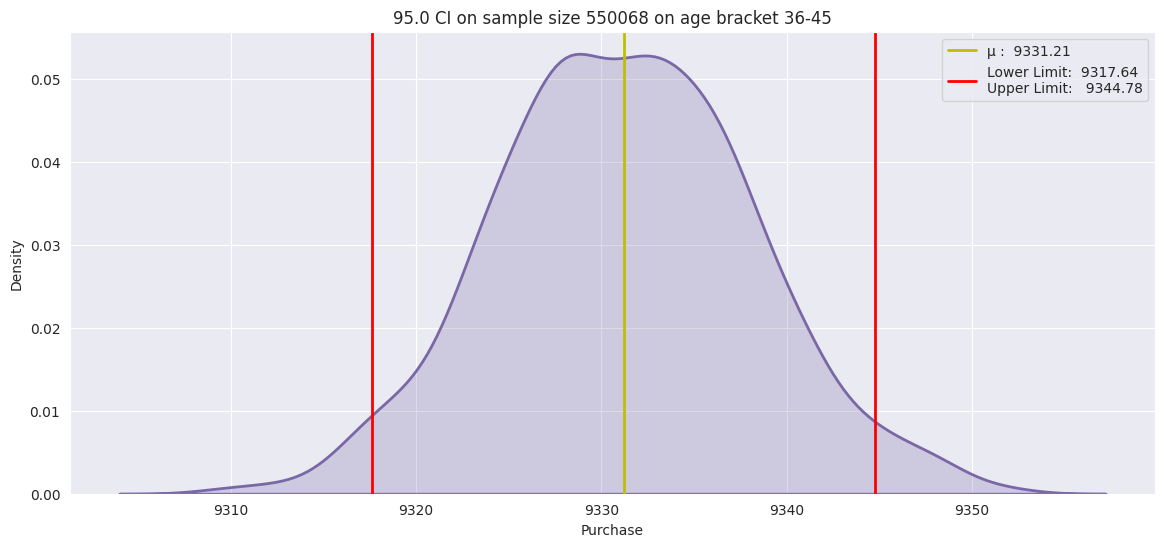

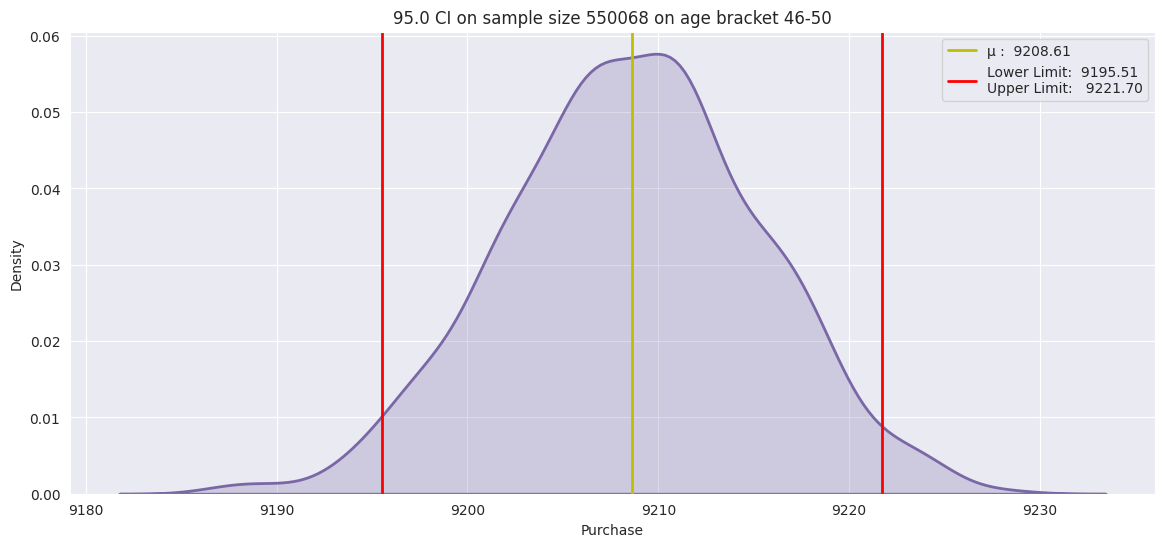

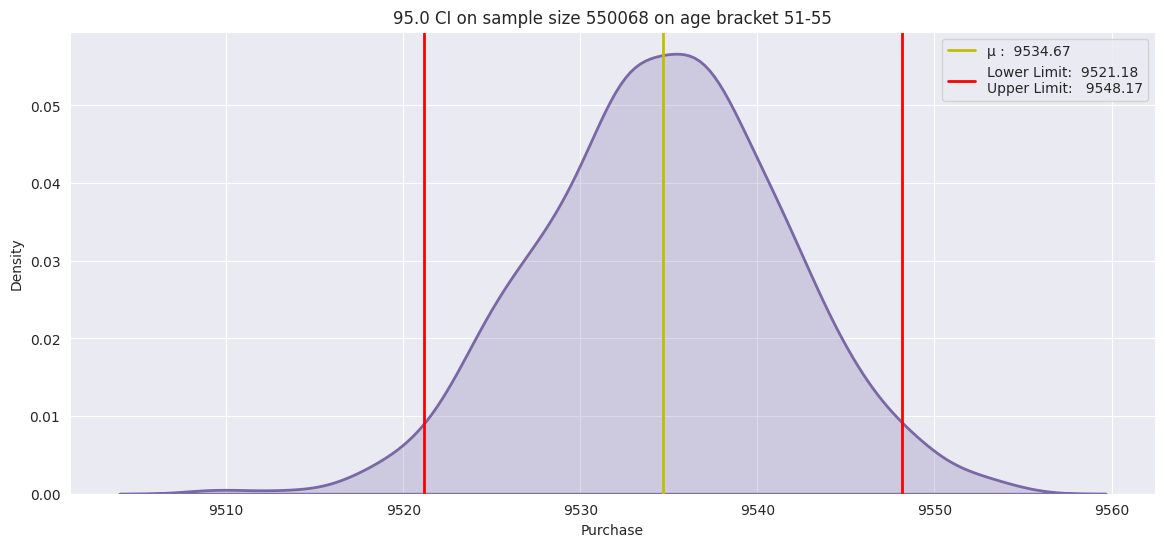

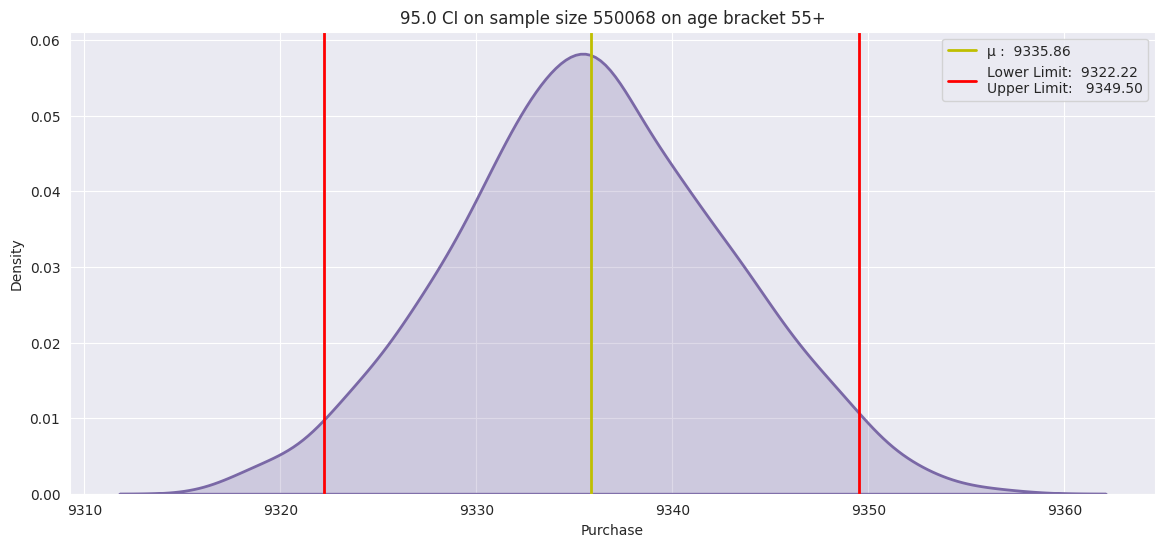

In [ ]:
itr_size = 1000
smp_size = 10000
ci = 0.95
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

array = np.empty((0,8))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(df[df['Age'] == age]['Purchase'],smp_siz,itr_size,ci, age)

    #array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),90]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

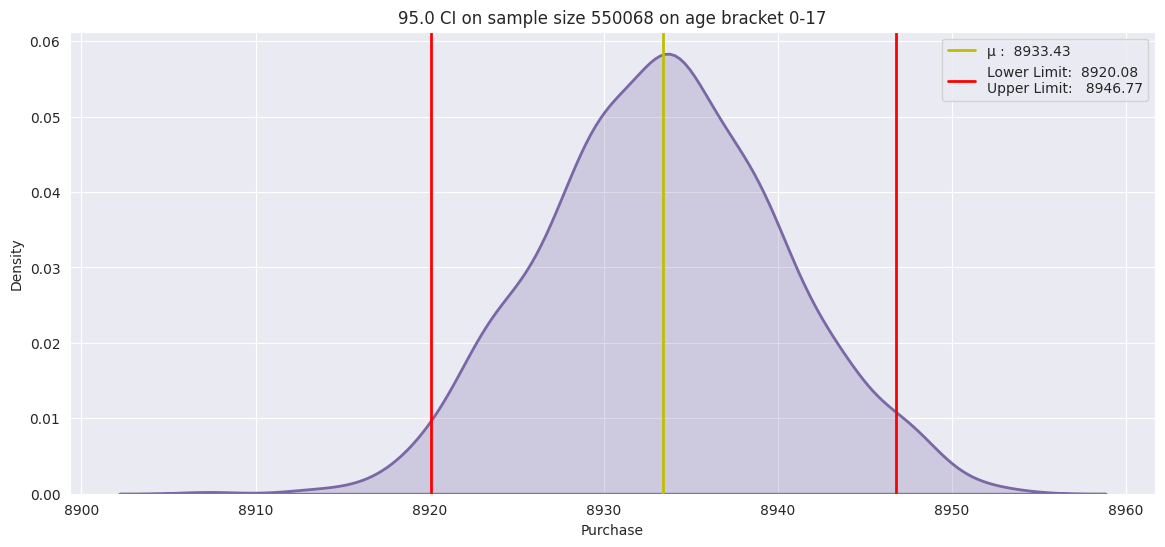

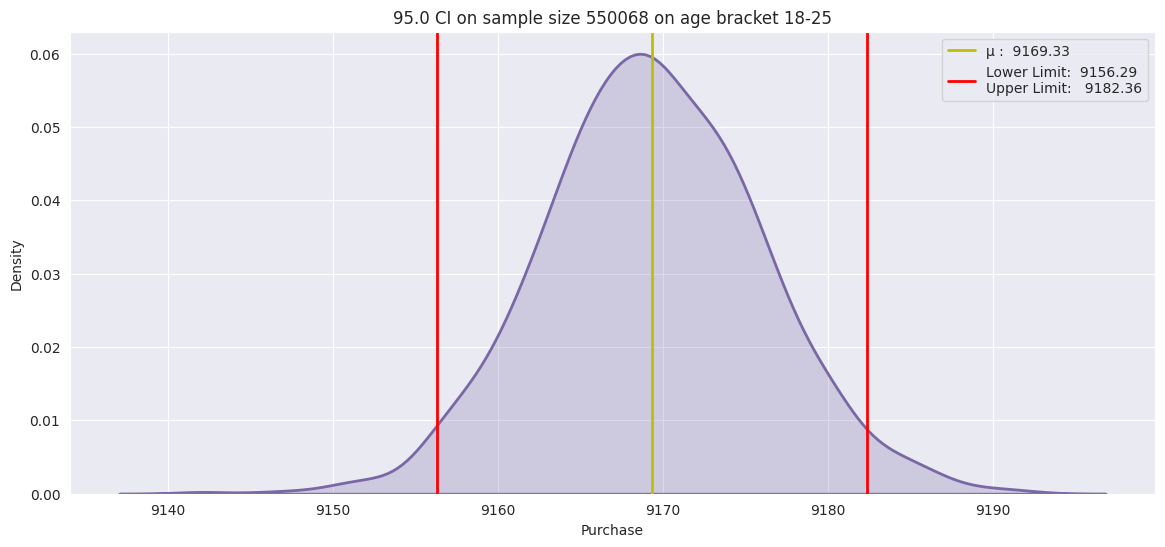

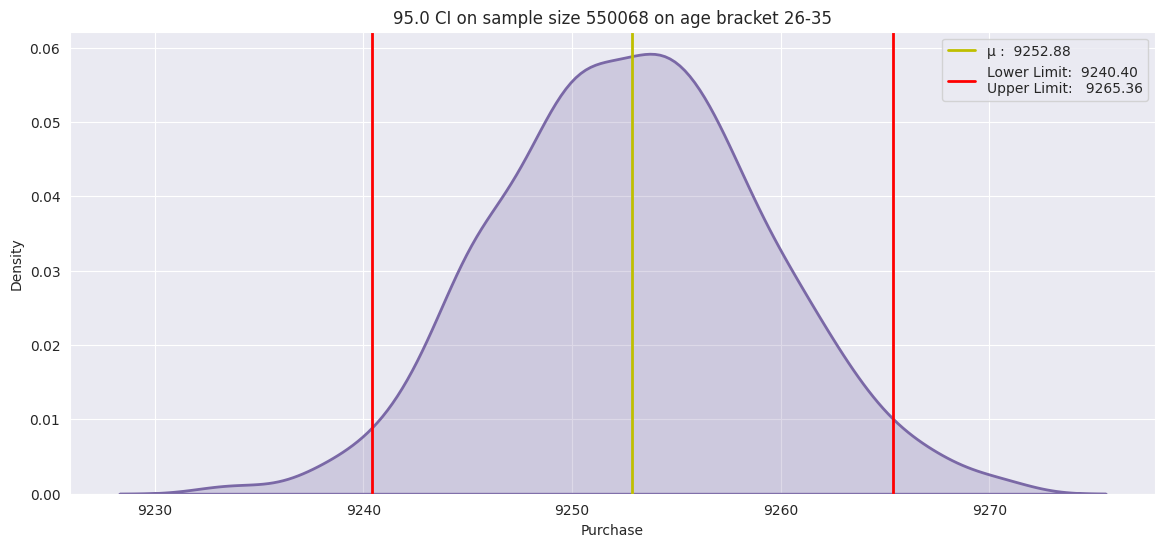

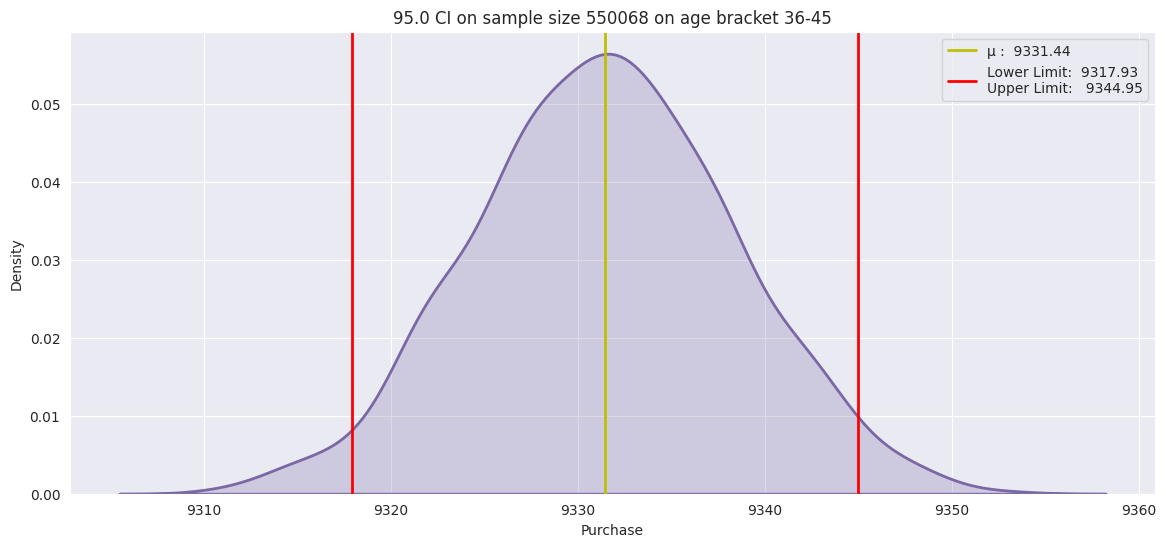

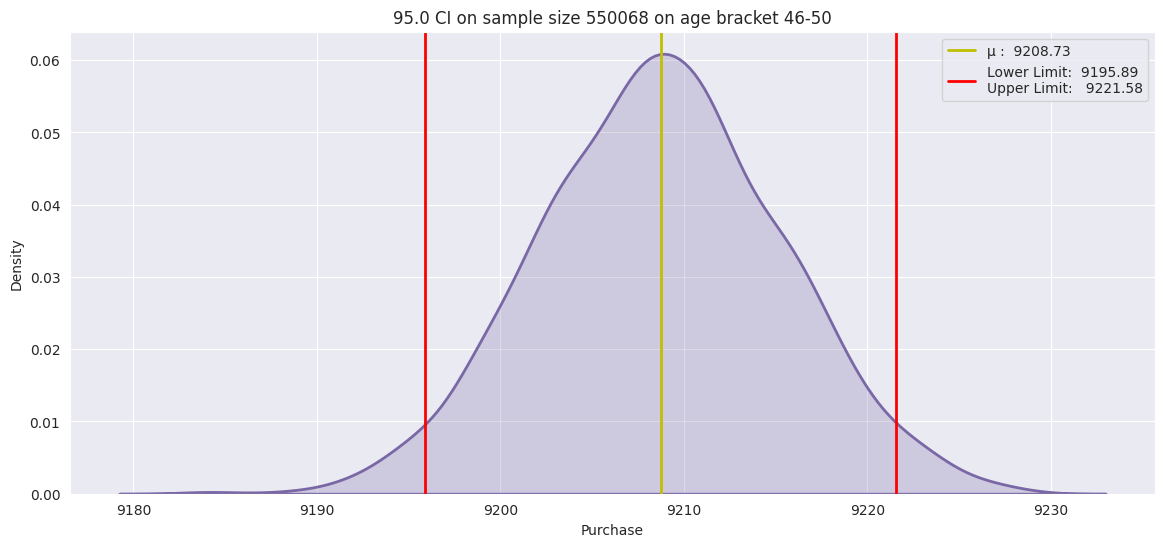

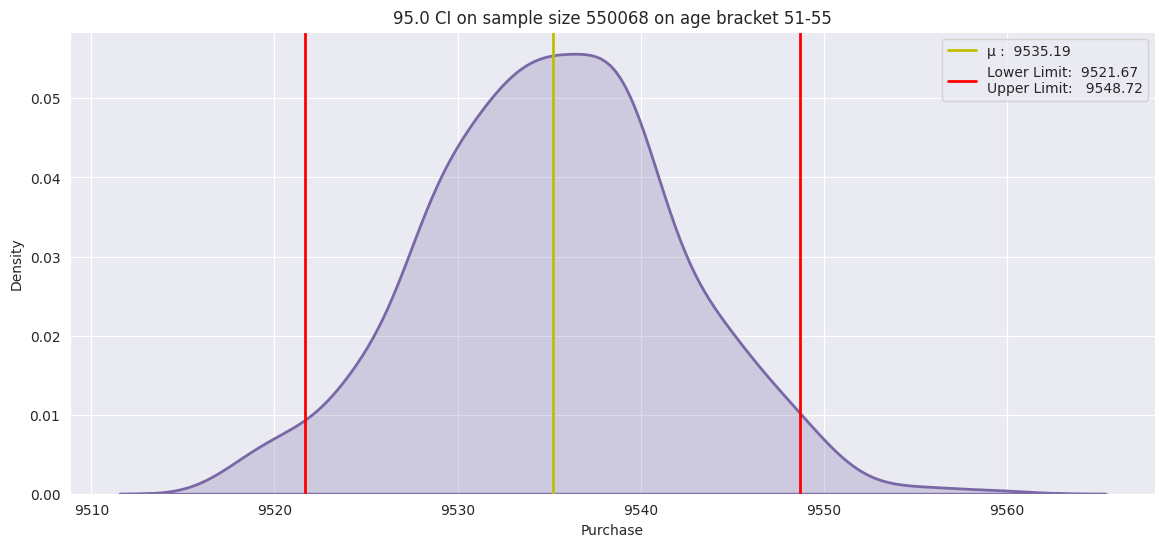

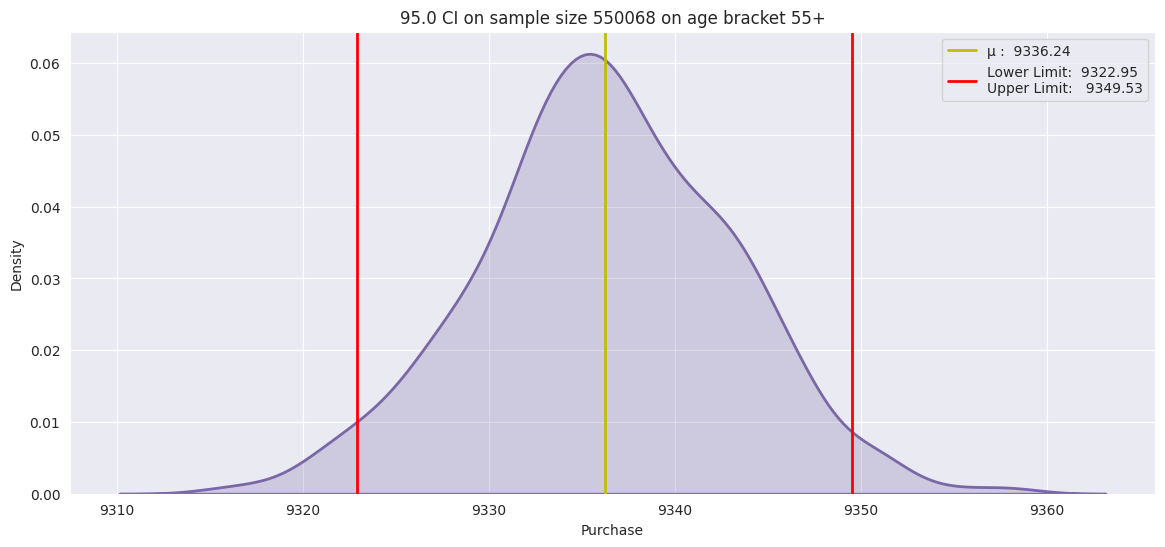

In [ ]:
itr_size = 1000
smp_size = df.shape[0]
ci = 0.95
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

array = np.empty((0,8))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(df[df['Age'] == age]['Purchase'],smp_siz,itr_size,ci, age)

    #array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),90]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

###**7. Create a report**


- As the sample size increases, the two groups start to become distinct. With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.49 with confidence is 90%.

- Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

- Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%

- For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8634.54, 8707.85]

- For Male range for mean purchase with confidence interval 99% is [9328.03, 9409.07]

- When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.46,59,73.31]

- Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.

- Spending by Age_group 0-17 is low compared to other age groups.

- Customers in Age_group 51-55 spend the most between 9381.9 and 9463.7

###**8. Recommendations**
- Write a detailed recommendation from the analysis that you have done

# ***Insights:***

- 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are Male and 25% are Female. Males clearly purchase more than
females.
- 59% Single, 41% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.
- The majority of users come from City Category C, but more people from City
Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.
- Majority of Customers purchase within the 5,000 - 20,000 range.
- Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45
- City Category B accounts for 42%, City Category C 31%, and City Category A
represents 27% of all customer purchases.Purchases are high in city category C
- Most mall customers are between the ages of 26 and 35. City category C has more customers between the ages of 18 and 45.
- In City Category C, there are slightly more female customers.
- Product 5 and 8 is common among females.